# Beta bank

## Table of Contents

1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Import the necessary libraries](#import-the-necessary-libraries)
4. [Load the Data](#load-the-data)
5. [Exploratory Data Analysis (EDA)](#eda)
6. [Fix missing values](#fix-missing-values)
7. [Categorization and standardization](#categorization-and-standardization)
8. [Accuracy for the decision tree](#accuracy-for-the-decision-tree)
9. [Random Forest](#random-forest)
10. [Class weight adjustment](#class-weight-adjustment)
11. [Oversampling](#oversampling)
12. [Undersampling](#undersampling)
13. [Threshold adjustment](#threshold-adjustment)
14. [Conclusion](#conclusion)


## Introduction

The goal of this project is to predict whether a customer of Beta Bank will leave the bank in the near future, using historical data on customer behavior and contract terminations. The task is to build a predictive model with an F1 score of at least 0.59. This involves preparing the data, analyzing class imbalance, and applying different techniques to address it. Additionally, multiple models will be trained and evaluated based on metrics like F1 and AUC-ROC to assess their performance.

## Objectives

- **Data Preparation and Class Imbalance Analysis**  
   Download, clean, and preprocess the data, and analyze the class imbalance between customers who stay and those who leave. This includes checking the class distribution and performing initial exploration without addressing the imbalance.

- **Improving the Model and Correcting Class Imbalance**  
   Apply at least two different techniques to correct class imbalance (such as oversampling, undersampling, or adjusting class weights) and train the model using training and validation sets to optimize performance.

- **Model Evaluation and Final Testing**  
   Evaluate the model using F1 and AUC-ROC metrics, ensuring the F1 score reaches at least 0.59. Conduct the final test of the model and compare the results across metrics to ensure the model is both robust and accurate.

## Import the necessary libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_auc_score, precision_recall_curve

# Data shuffling
from sklearn.utils import shuffle

# Visualization
import matplotlib.pyplot as plt

## Load the Data

In [2]:
# Leemos el dataset
data = pd.read_csv('Churn.csv')

## EDA

In [3]:
# Preliminary analysis of the data
data.info()
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    156

Our dataset has around 900 missing values in the 'Tenure' column, we will proceed to fix this by using the median.

## Fix missing values

In [4]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
print(data.isnull().sum())
data['Exited'].mean()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


C:\Users\Felip\AppData\Local\Temp\ipykernel_25540\385235940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tenure'].fillna(data['Tenure'].median(), inplace=True)


0.2037

The missing values have been fixed.

## Categorization and standardization

In [5]:
# Create a class instance
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.shape)

(7500, 2944)


## Accuracy for the decision tree

In [6]:
# Train the model
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(accuracy_valid)

0.8152


In [7]:
matrix = confusion_matrix(target_valid,predicted_valid)
print(matrix)

[[1783  182]
 [ 280  255]]


In [8]:
print(recall_score(target_valid, predicted_valid))

0.4766355140186916


In [9]:
print(precision_score(target_valid, predicted_valid))

0.5835240274599542


In [10]:
f1 = f1_score(target_valid, model.predict(features_valid))
print (f1)

0.5246913580246914


In general, the model has room for improvement, as our F1 score was 0.52, which indicates a moderate acceptance margin. Considering the values from the confusion matrix, the model is focusing more on the majority class (class 0), and there is a significant error margin with the minority class (class 1).

## Ramdom forest

In [14]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------------------ --------------------- 112.6/238.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=12345)

# Apply SMOTE to upsample the data
features_upsampled, target_upsampled = smote.fit_resample(features_train, target_train)


In [16]:
# Define the model
model_rf = RandomForestClassifier(random_state=12345)

# Fit the model
model_rf.fit(features_upsampled, target_upsampled)

RandomForestClassifier(random_state=12345)

In [17]:
# Get prediction probabilities
probabilities = model_rf.predict_proba(features_valid)[:, 1]

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities)

# Find the threshold that maximizes the F1 Score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

# Apply the best threshold
predicted_valid_adjusted = (probabilities >= best_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print('F1 Score with adjusted threshold:', f1_score(target_valid, predicted_valid_adjusted))
print('Classification Report with adjusted threshold:\n', classification_report(target_valid, predicted_valid_adjusted))


F1 Score with adjusted threshold: 0.0
Classification Report with adjusted threshold:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1965
           1       0.00      0.00      0.00       535

    accuracy                           0.79      2500
   macro avg       0.39      0.50      0.44      2500
weighted avg       0.62      0.79      0.69      2500



C:\Users\Felip\AppData\Local\Temp\ipykernel_25540\1475082981.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


## Class weight adjustment

In [18]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5051020408163265


Adjusting the weights did not work, as our model worsened due to the decrease in the F1 score.

## Oversampling

In [19]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Replicate instances of the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Apply oversampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# Train the model
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

# Make predictions on the validation set
predicted_valid = model.predict(features_valid)

# Evaluate the model
print('F1 Score:', f1_score(target_valid, predicted_valid))
print('Classification Report:')
print(classification_report(target_valid, predicted_valid))


F1 Score: 0.49498327759197325
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1573
           1       0.38      0.69      0.49       427

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.78      0.70      0.72      2000



The result with oversampling is similar, there is no improvement in the model.

## Undersampling

In [20]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

print(features_downsampled.shape)
print(target_downsampled.shape)
print()
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

(2249, 2944)
(2249,)

F1: 0.3518747424804285


Undersampling is not the solution either, as there was a significant deterioration in our model.

## Threshold adjustment

In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(
        'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
            threshold, precision, recall
        )
    )

Threshold = 0.00 | Precision = 0.213, Recall = 1.000
Threshold = 0.02 | Precision = 0.213, Recall = 1.000
Threshold = 0.04 | Precision = 0.213, Recall = 1.000
Threshold = 0.06 | Precision = 0.213, Recall = 1.000
Threshold = 0.08 | Precision = 0.213, Recall = 1.000
Threshold = 0.10 | Precision = 0.213, Recall = 1.000
Threshold = 0.12 | Precision = 0.213, Recall = 1.000
Threshold = 0.14 | Precision = 0.223, Recall = 0.956
Threshold = 0.16 | Precision = 0.252, Recall = 0.763
Threshold = 0.18 | Precision = 0.251, Recall = 0.747
Threshold = 0.20 | Precision = 0.253, Recall = 0.686
Threshold = 0.22 | Precision = 0.251, Recall = 0.522
Threshold = 0.24 | Precision = 0.236, Recall = 0.274
Threshold = 0.26 | Precision = 0.259, Recall = 0.119
Threshold = 0.28 | Precision = 0.311, Recall = 0.044


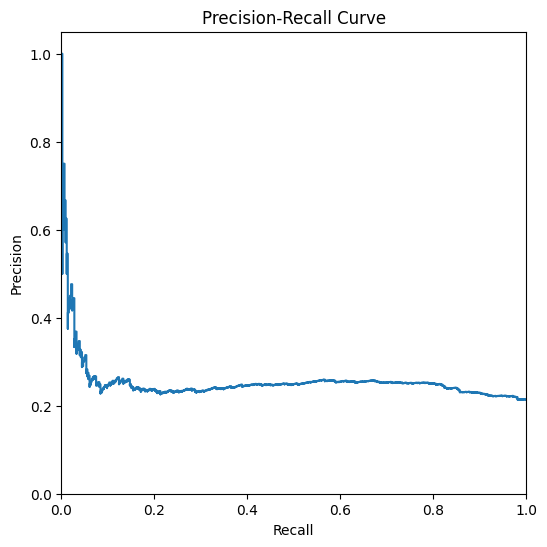

In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

The threshold adjustment indicates that the model will not improve further with values exceeding a margin between 2.0 and 2.5.

In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.5733774422299012


## Conclusion

Multiple models were applied to try to improve the initial F1 score, but none showed improvements; all displayed a decline. The oversampling and class adjustment methods decreased the F1 scores by about 0.1. The threshold adjustment method was applied, but it did not show a significant improvement compared to the previous thresholds.